# Hong Kong's Primary school analyze

## 1. Introduction

In light of Hong Kong's rapid societal and economic development, the equitable distribution of educational resources has emerged as a pivotal concern within the city's education system. The unequal distribution of educational resources across different districts and the discrepancies in the quality of education and students' learning outcomes across different types of schools have significant implications for educational equity and students' long-term development. 

The objective of this study is to analyze the discrepancies in the allocation of educational resources and the resulting educational outcomes across different districts and school types in Hong Kong. By gathering and examining data on the distribution of educational resources in various districts and the academic performance of different types of schools, we aim to identify the following pivotal issues:

- Regional Differences: Are there significant discrepancies in the accessibility and caliber of educational resources across regions? How do these discrepancies influence student learning outcomes?
- School Type: Are there differences in the allocation of educational resources and the quality of education across different types of schools (public, private)?

## 2. Data Precessing

### 2.1 Data Import

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Data import
psp_2022 = pd.read_csv('psp_2022_tc.csv')
psp_2023 = pd.read_csv('psp_2023_tc.csv')

In [3]:
psp_2022.columns

Index(['區域', '學校名稱', '學校地址', '小一學校網', '學校電話', '學校傳真', '學校電郵', '學校網址', '學校類別1',
       '學校類別2',
       ...
       '非華語學生的教育支援', '課程剪裁及調適措施', '家校合作及校風超連結', '家校合作', '校風', '未來發展超連結',
       '學校發展計劃', '教師專業培訓及發展', '學校特色_其他', '學費減免'],
      dtype='object', length=109)

### 2.2 Data cleaning and initial exploration

In [4]:
# 2022 info
print(psp_2022.info())
print(psp_2022.describe())

# 2023 info
print(psp_2023.info())
print(psp_2023.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Columns: 109 entries, 區域 to 學費減免
dtypes: float64(2), int64(33), object(74)
memory usage: 435.3+ KB
None
               學校電話          學校傳真         創校年份        學校佔地面積        課室數目  \
count  5.110000e+02  5.110000e+02   511.000000    511.000000  511.000000   
mean   2.582607e+07  2.579823e+07  1972.340509   5341.928571   25.295499   
std    3.711404e+06  2.372896e+06    29.185302   3294.513916    6.924577   
min    2.109004e+07  2.109001e+07  1851.000000    500.000000    6.000000   
25%    2.416166e+07  2.424387e+07  1959.000000   3200.000000   24.000000   
50%    2.546626e+07  2.559414e+07  1975.000000   5000.000000   25.000000   
75%    2.678397e+07  2.708637e+07  1995.000000   6600.000000   30.000000   
max    8.208209e+07  3.976230e+07  2021.000000  30000.000000   76.000000   

             禮堂數目        操場數目       圖書館數目       教師總人數   教育文憑人數百分率  ...  \
count  511.000000  511.000000  511.000000  511.000000  511.000000

In [5]:
# 假设psp2022是你的DataFrame
columns_psp = [
    '區域','學校名稱','學校地址','學校類別1','學校類別2','學生性別',
    '學校佔地面積','教學語言','教師總人數','教育文憑人數百分率',
    '學士人數百分率','碩士_博士或以上人數百分率','特殊教育培訓人數百分率','0至4年經驗人數百分率',
    '5至9年經驗人數百分率','10年經驗或以上人數百分率','上學年小一班數','上學年小二班數','上學年小三班數',
    '上學年小四班數','上學年小五班數','上學年小六班數','上學年總班數','本學年小一班數','本學年小二班數',
    '本學年小三班數','本學年小四班數','本學年小五班數','本學年小六班數','本學年總班數'
]


# 创建一个仅包含需要保留列的新DataFrame
psp_2022 = psp_2022[columns_psp]
psp_2023 = psp_2023[columns_psp]

# 确认新DataFrame
print(psp_2022.head())
print(psp_2023.head())

     區域          學校名稱          學校地址 學校類別1 學校類別2 學生性別  學校佔地面積           教學語言  \
0   中西區      聖公會聖馬太小學  香港上環新街12-20號    資助    全日   男女  1487.0             中文   
1  香港南區       聖保羅書院小學    香港域多利道777號    直資    全日    男  5380.0  中文（包括：普通話）及英文   
2   中西區      天主教總堂區學校       香港中環律打街    資助    全日   男女  6000.0             英文   
3   中西區  英皇書院同學會小學第二校    香港上環普慶坊40號    資助    全日   男女  4948.0             中文   
4   中西區        新會商會學校     香港上環居賢坊1號    資助    全日   男女   700.0             中文   

   教師總人數  教育文憑人數百分率  ...  上學年小五班數  上學年小六班數  上學年總班數  本學年小一班數  本學年小二班數  本學年小三班數  \
0     30        100  ...        2        2      12        1        2        2   
1     55        100  ...        4        4      24        4        4        4   
2     51        100  ...        4        3      22        3        3        4   
3     38        100  ...        3        3      18        3        3        3   
4     30        100  ...        2        3      13        1        2        2   

   本學年小四班數  本學年小五班數  本學年小六班數  本學年總班數  

In [6]:
# Check for missing values

print(psp_2022.isnull().sum())
print(psp_2023.isnull().sum())


區域               0
學校名稱             0
學校地址             0
學校類別1            0
學校類別2            0
學生性別             0
學校佔地面積           0
教學語言             0
教師總人數            0
教育文憑人數百分率        0
學士人數百分率          0
碩士_博士或以上人數百分率    0
特殊教育培訓人數百分率      0
0至4年經驗人數百分率      0
5至9年經驗人數百分率      0
10年經驗或以上人數百分率    0
上學年小一班數          0
上學年小二班數          0
上學年小三班數          0
上學年小四班數          0
上學年小五班數          0
上學年小六班數          0
上學年總班數           0
本學年小一班數          0
本學年小二班數          0
本學年小三班數          0
本學年小四班數          0
本學年小五班數          0
本學年小六班數          0
本學年總班數           0
dtype: int64
區域               0
學校名稱             0
學校地址             0
學校類別1            0
學校類別2            0
學生性別             0
學校佔地面積           0
教學語言             0
教師總人數            0
教育文憑人數百分率        0
學士人數百分率          0
碩士_博士或以上人數百分率    0
特殊教育培訓人數百分率      0
0至4年經驗人數百分率      0
5至9年經驗人數百分率      0
10年經驗或以上人數百分率    0
上學年小一班數          0
上學年小二班數          0
上學年小三班數          0
上學年小四班數          0
上學年小五班數          0
上學年小六班數          0

In [7]:
teacher_2022 = psp_2022[['區域','教師總人數','教育文憑人數百分率',
    '學士人數百分率','碩士_博士或以上人數百分率','特殊教育培訓人數百分率','0至4年經驗人數百分率',
    '5至9年經驗人數百分率','10年經驗或以上人數百分率']]

teacher_2023 = psp_2023[['區域','教師總人數','教育文憑人數百分率',
    '學士人數百分率','碩士_博士或以上人數百分率','特殊教育培訓人數百分率','0至4年經驗人數百分率',
    '5至9年經驗人數百分率','10年經驗或以上人數百分率']]

## 3. Exploratory Data Analysis

In [8]:
school_counts_2022 = psp_2022['區域'].value_counts()
school_counts_2023 = psp_2023['區域'].value_counts()

df_counts = pd.DataFrame({'2022': school_counts_2022, '2023': school_counts_2023}).fillna(0)

df_counts['Total'] = df_counts['2022'] + df_counts['2023']

def plot_school_counts(df_counts):
    plt.figure(figsize=(16, 10))
    # 使用統一調色板的顏色
    ax = sns.barplot(x=df_counts.index, y=df_counts['2022'], color=palette[0], label='2022', alpha=0.7)
    sns.barplot(x=df_counts.index, y=df_counts['2023'], color=palette[1], label='2023', alpha=0.7)
    
    # 添加數據標籤
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', fontproperties='SimHei', fontsize=10)
    
    plt.title('2022年和2023年各區域學校數量對比', fontsize=16, fontproperties='SimHei')
    plt.xlabel('區域', fontsize=14, fontproperties='SimHei')
    plt.ylabel('學校數量', fontsize=14, fontproperties='SimHei')
    plt.xticks(rotation=45, fontproperties='SimHei', fontsize=10)
    plt.legend(title='年份', prop='SimHei')
    plt.tight_layout()
    plt.show()

### Distribution of Educational Resources: Regional Differences

In [9]:
students_per_class = 30

psp_2022['本學年學生總數'] = (psp_2022['本學年總班數']) * students_per_class
psp_2023['本學年學生總數'] = (psp_2023['本學年總班數']) * students_per_class
# 计算每个区域的上学年和本学年的学生总数和教师总数
region_stats_2022 = psp_2022.groupby('區域').agg({'本學年學生總數': 'sum', '教師總人數': 'sum'}).reset_index()
region_stats_2023 = psp_2023.groupby('區域').agg({'本學年學生總數': 'sum', '教師總人數': 'sum'}).reset_index()
# 计算每个区域的上学年和本学年的学生与教师比例
region_stats_2022['本學年學生教師比例'] = region_stats_2022['本學年學生總數'] / region_stats_2022['教師總人數']
region_stats_2023['本學年學生教師比例'] = region_stats_2023['本學年學生總數'] / region_stats_2023['教師總人數']

# 统计每个区域的学校数量
school_count_2022 = psp_2022.groupby('區域').size().reset_index(name='學校數量')
school_count_2023 = psp_2023.groupby('區域').size().reset_index(name='學校數量')

# 合并学校数量到区域统计数据
region_stats_2022 = pd.merge(region_stats_2022, school_count_2022, on='區域')
region_stats_2023 = pd.merge(region_stats_2023, school_count_2023, on='區域')


In [12]:
region_stats_2022['年份'] = 2022
region_stats_2023['年份'] = 2023

df_combined = pd.concat([region_stats_2022, region_stats_2023])

sns.set(style="whitegrid")

def plot_comparison_with_labels(data, x_col, y_col, title, xlabel, ylabel, sort_by, palette="viridis"):
    sorted_data = data.sort_values(by=[sort_by, '年份'], ascending=False)
    
    plt.figure(figsize=(16, 10))
    ax = sns.barplot(x=x_col, y=y_col, hue='年份', data=sorted_data, palette=palette, order=sorted_data[x_col].unique())
    
    plt.title(title, fontsize=16, fontproperties='SimHei')
    plt.xlabel(xlabel, fontsize=14, fontproperties='SimHei')
    plt.ylabel(ylabel, fontsize=14, fontproperties='SimHei')
    plt.xticks(rotation=45, fontproperties='SimHei', fontsize=10)
    
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', fontproperties='SimHei', fontsize=6)
    
    legend = plt.legend(title='年份', loc='upper right', fontsize=10, title_fontsize='10', prop='SimHei')
    plt.setp(legend.get_texts(), fontproperties='SimHei')
    plt.setp(legend.get_title(), fontproperties='SimHei')
    plt.tight_layout()
    plt.show()


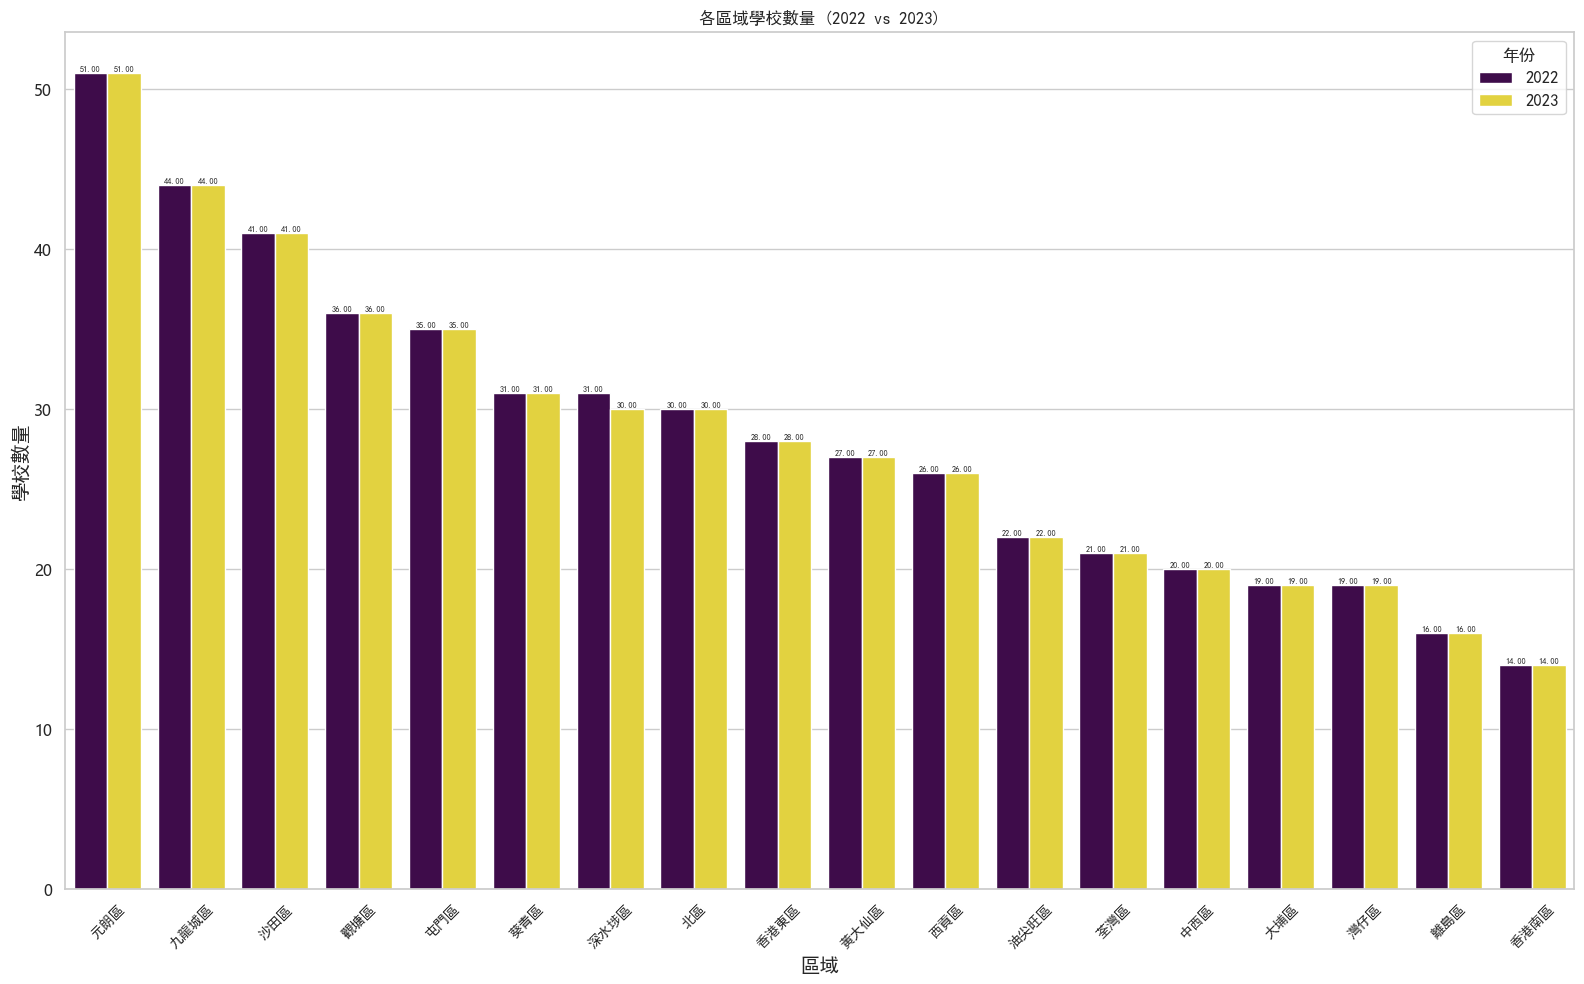

In [45]:
plot_comparison_with_labels(df_combined, '區域', '學校數量', '各區域學校數量 (2022 vs 2023)', '區域', '學校數量', '學校數量')

- only one elementary school in Sham Shui Po has been reduced in this year.

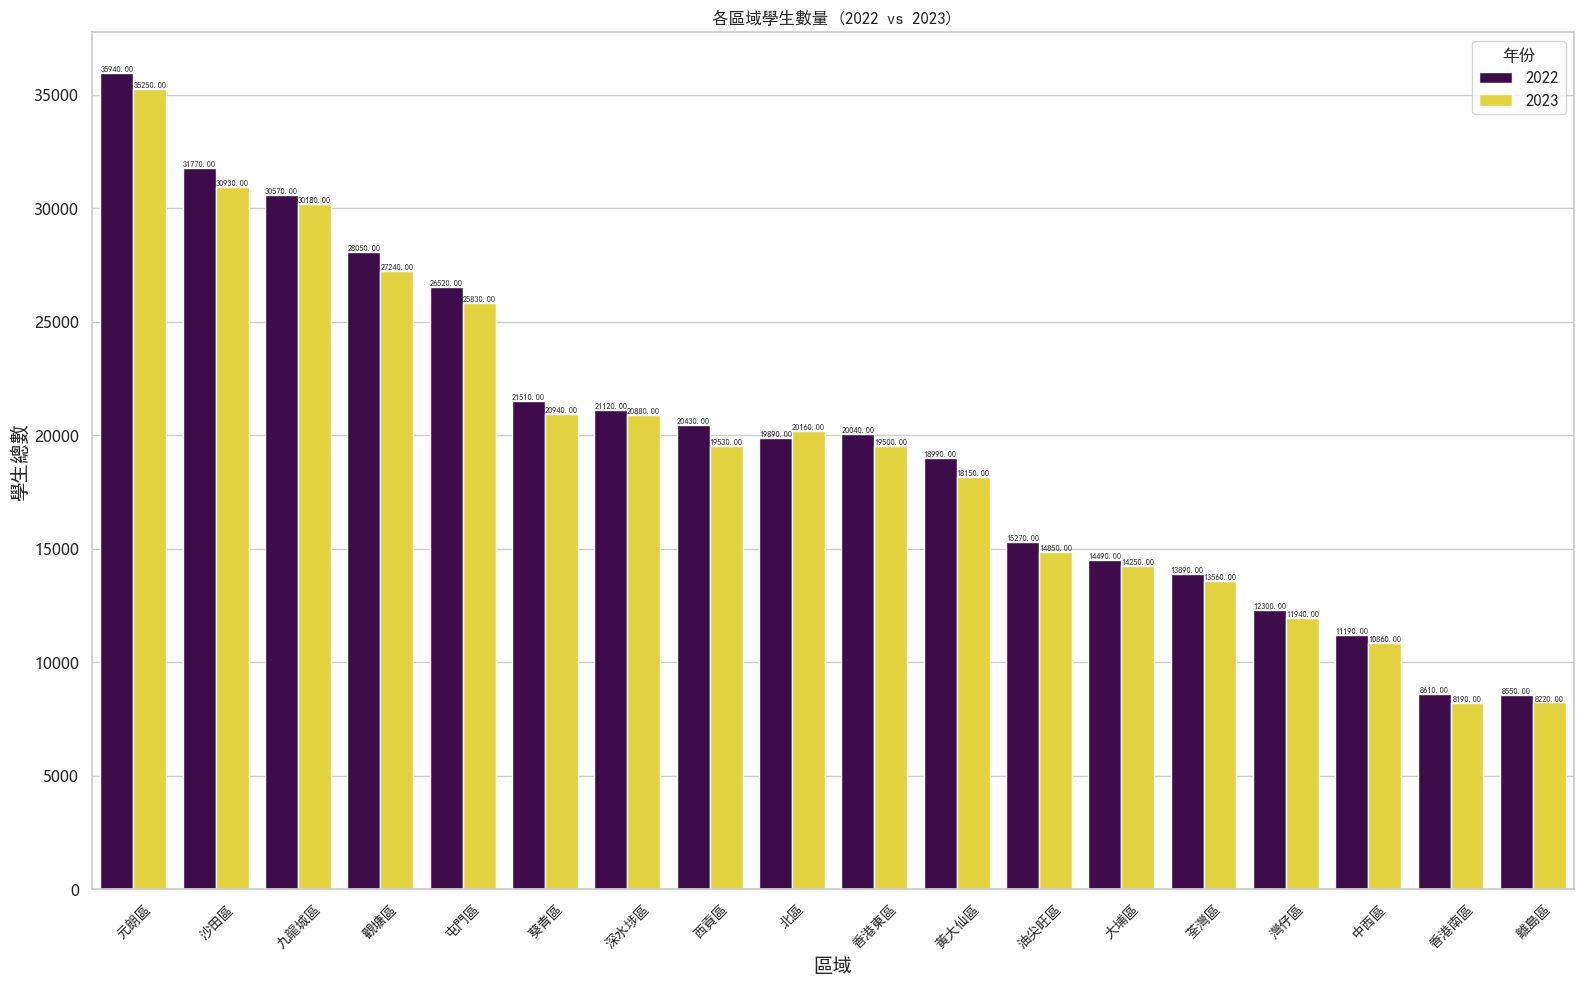

In [46]:
plot_comparison_with_labels(df_combined, '區域', '本學年學生總數', '各區域學生數量 (2022 vs 2023)', '區域', '學生總數', '本學年學生總數')

Changes in student numbers:
- The total number of students decreased slightly in most districts.
- Some districts, like Kwun Tong and Sham Shui Po, saw a slight drop in students. This shows changes in their demographics.

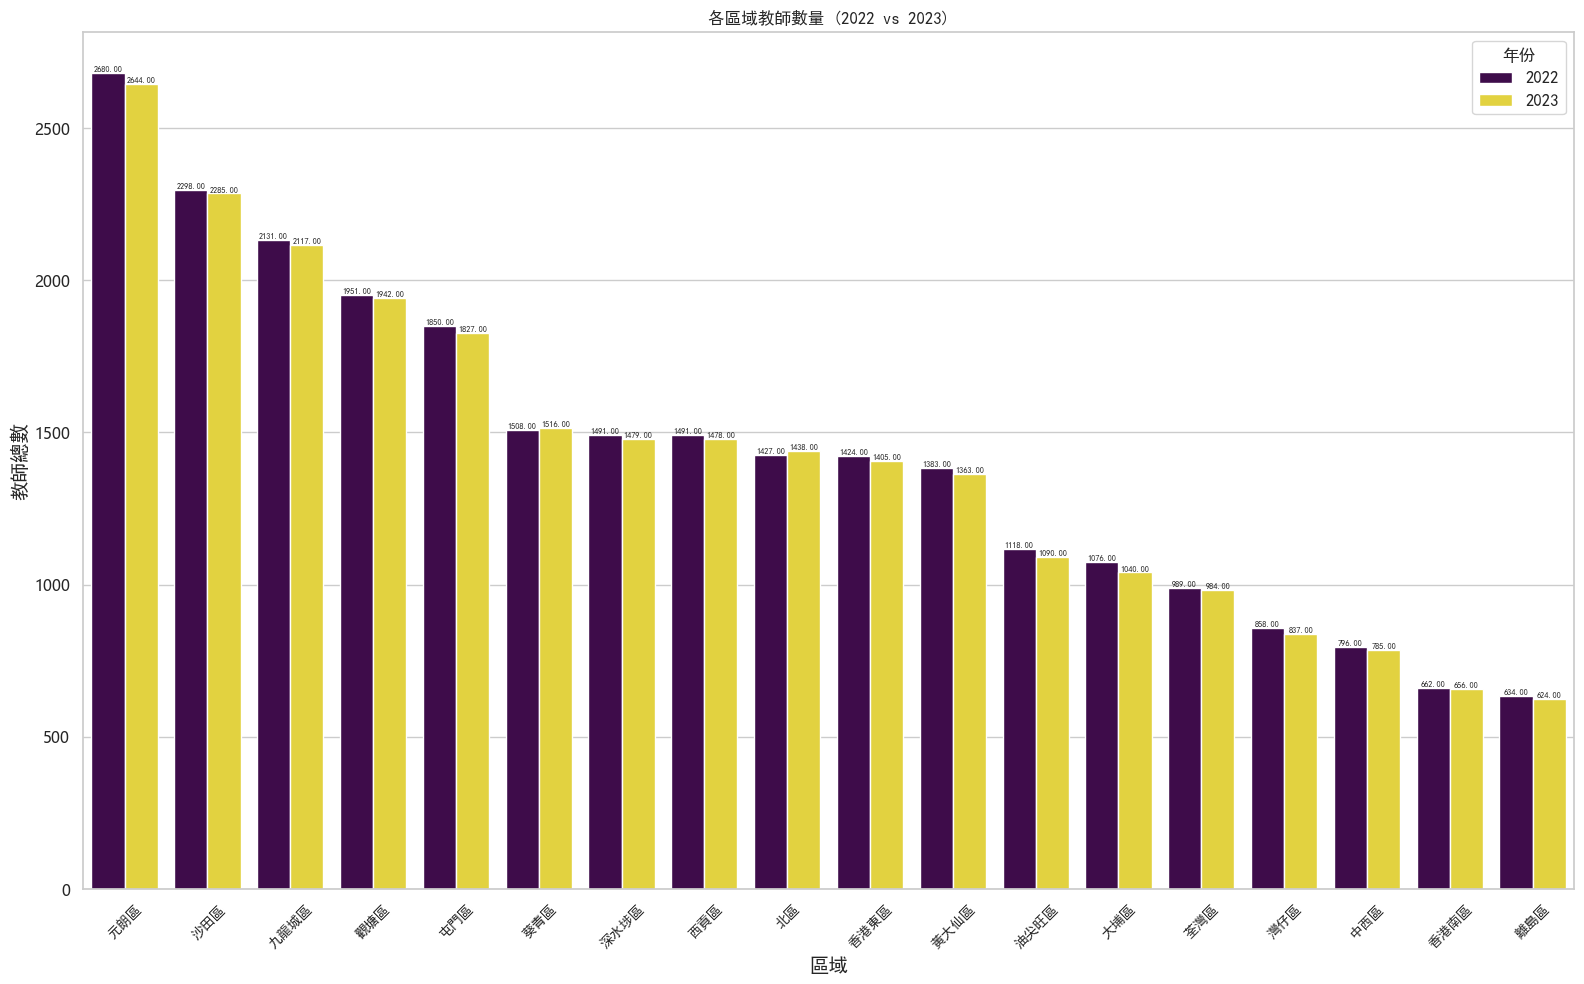

In [47]:
plot_comparison_with_labels(df_combined, '區域', '教師總人數', '各區域教師數量 (2022 vs 2023)', '區域', '教師總數', '教師總人數')

- The number of teachers fell in most districts, except for North and Kwai Tsing, where it rose.

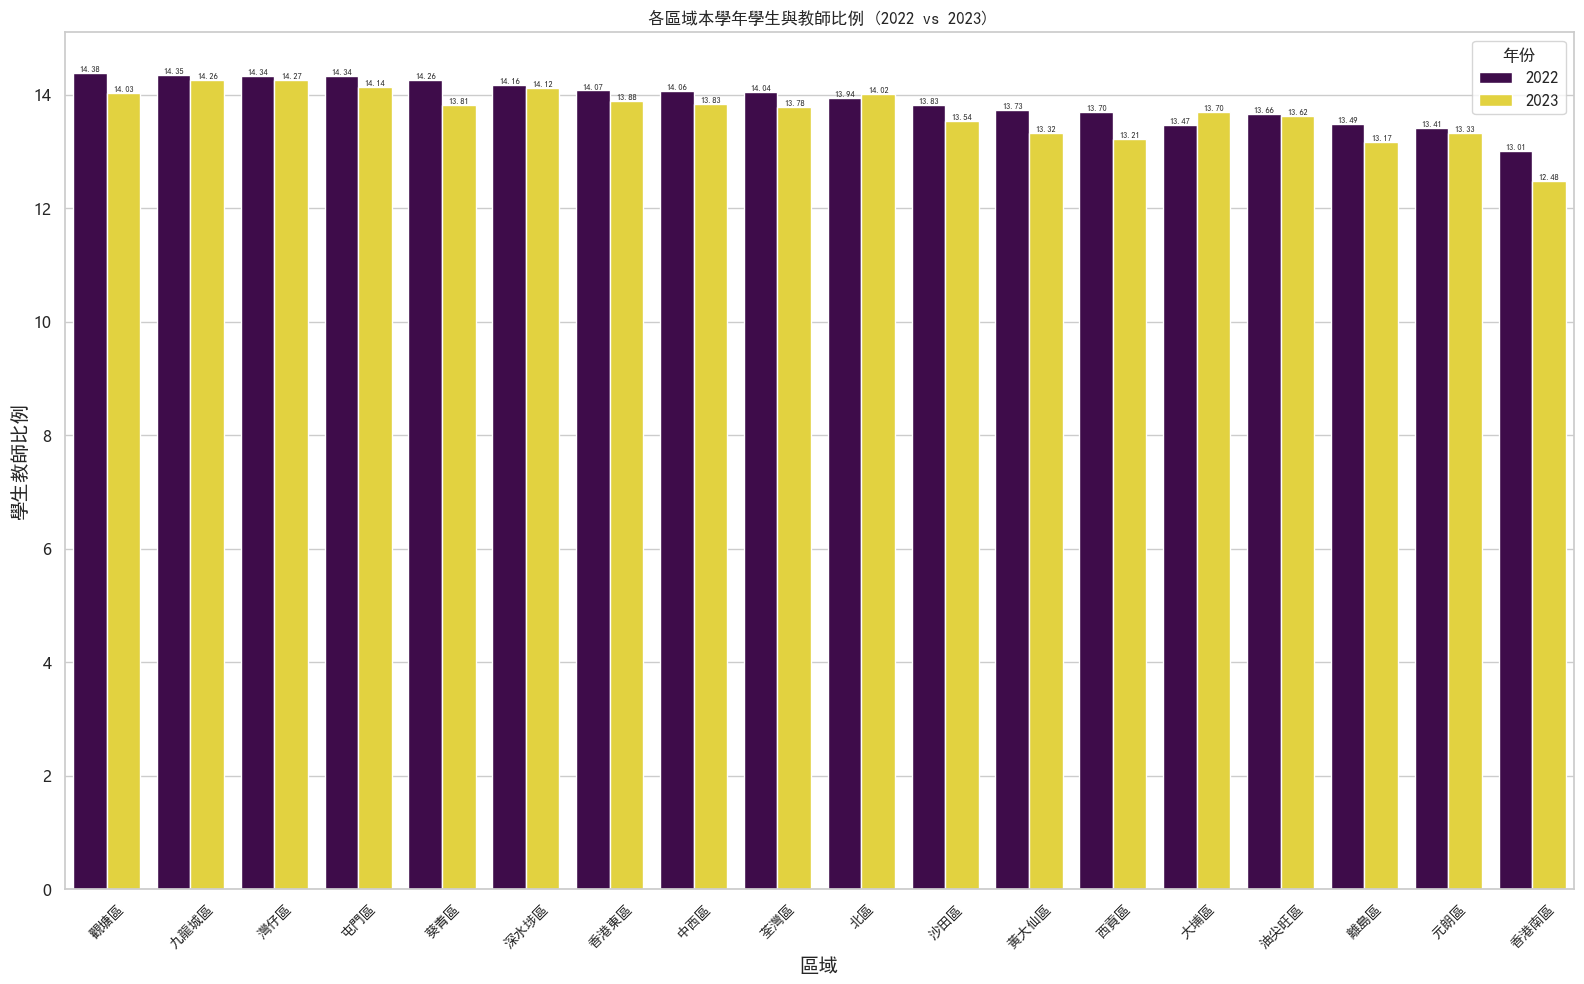

In [48]:
plot_comparison_with_labels(df_combined, '區域', '本學年學生教師比例', '各區域本學年學生與教師比例 (2022 vs 2023)', '區域', '學生教師比例', '本學年學生教師比例')

- The student-teacher ratios in most districts showed slight fluctuations, but the overall trend remained stable. A few exceptions with more volatility, such as Sai Kung, where the ratio ranged from 13.70 to 13.21, and Hong Kong South, where the ratio dropped from 13.01 to 12.48, demonstrated a notable decrease in the number of students in the district

In [14]:
def calculate_weighted_average(group):
    total = group['教師總人數'].sum()
    per_education = (group['教育文憑人數百分率'] * group['教師總人數']).sum() / total
    per_bachelor = (group['學士人數百分率'] * group['教師總人數']).sum() / total
    per_master_phd = (group['碩士_博士或以上人數百分率'] * group['教師總人數']).sum() / total
    per_special_edu = (group['特殊教育培訓人數百分率'] * group['教師總人數']).sum() / total
    exp_0to4 = (group['0至4年經驗人數百分率'] * group['教師總人數']).sum() / total
    exp_5to9 = (group['5至9年經驗人數百分率'] * group['教師總人數']).sum() / total
    exp_10plus = (group['10年經驗或以上人數百分率'] * group['教師總人數']).sum() / total
    return pd.Series({
        '教師總人數': total,
        '教育文憑百分率': per_education,
        '學士百分率': per_bachelor,
        '碩士_博士百分率': per_master_phd,
        '特殊教育培訓百分率': per_special_edu,
        '0至4年經驗百分率': exp_0to4,
        '5至9年經驗百分率': exp_5to9,
        '10年經驗或以上百分率': exp_10plus
    })

In [15]:
result_2022 = teacher_2022.groupby("區域").apply(calculate_weighted_average).reset_index()
result_2023 = teacher_2023.groupby("區域").apply(calculate_weighted_average).reset_index()
print(result_2022)
print(result_2023)


      區域   教師總人數    教育文憑百分率      學士百分率   碩士_博士百分率  特殊教育培訓百分率  0至4年經驗百分率  \
0    中西區   796.0  96.263819  98.253769  40.025126  35.956030  22.537688   
1   九龍城區  2131.0  99.279681  98.779916  35.183013  36.267480  19.790709   
2    元朗區  2680.0  96.026493  98.148881  32.700373  35.794030  24.079104   
3     北區  1427.0  98.831815  97.327961  31.178697  44.037141  19.366503   
4    大埔區  1076.0  98.675651  98.698885  34.569703  38.471190  27.473048   
5    屯門區  1850.0  96.442162  98.439459  30.001622  39.754595  21.059459   
6    沙田區  2298.0  95.771540  98.106614  31.482158  39.998695  20.964752   
7   油尖旺區  1118.0  97.605546  98.775492  36.269231  40.492844  18.810376   
8   深水埗區  1491.0  97.571429  98.735077  34.867874  33.922200  22.522468   
9    灣仔區   858.0  98.264569  95.689977  35.672494  33.622378  21.529138   
10   荃灣區   989.0  99.595551  98.771486  34.106168  45.939333  14.945399   
11   葵青區  1508.0  98.553714  96.972812  33.472149  42.826260  20.008621   
12   西貢區  1491.0  98.4896

C:\Users\chris\AppData\Local\Temp\ipykernel_31444\2573473095.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result_2022 = teacher_2022.groupby("區域").apply(calculate_weighted_average).reset_index()
C:\Users\chris\AppData\Local\Temp\ipykernel_31444\2573473095.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result_2023 = teacher_2023.groupby("區域").apply(calculate_weighted_average).reset_index()


In [16]:
result_2022['年份'] = 2022
result_2023['年份'] = 2023

region_teacher = pd.concat([result_2022, result_2023])

# 字體
import matplotlib as mpl
# Configure font settings
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # or other Chinese font
mpl.rcParams['axes.unicode_minus'] = False  # Fix minus sign display

def plot_education_diploma_rate(region_teacher, x_col, y_col, title, xlabel, ylabel):
    plt.figure(figsize=(15, 6))
    sns.lineplot(data=region_teacher, x=x_col, y=y_col, hue='年份', marker='o')
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.legend(title='年份')
    plt.tight_layout()
    plt.show()


In [18]:
def plot_education_diploma_rate_change(region_teacher, x_col, y_col, title, xlabel, ylabel):
    changes = (result_2023.set_index('區域') - result_2022.set_index('區域')) / result_2022.set_index('區域') * 100
    changes = changes.reset_index()

    plt.figure(figsize=(15, 6))
    sns.barplot(x=x_col, y=y_col, data=changes)
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.legend(title='年份')
    plt.tight_layout()
    plt.show()

### Show trends in teacher diploma percentages to see which areas are improving or declining

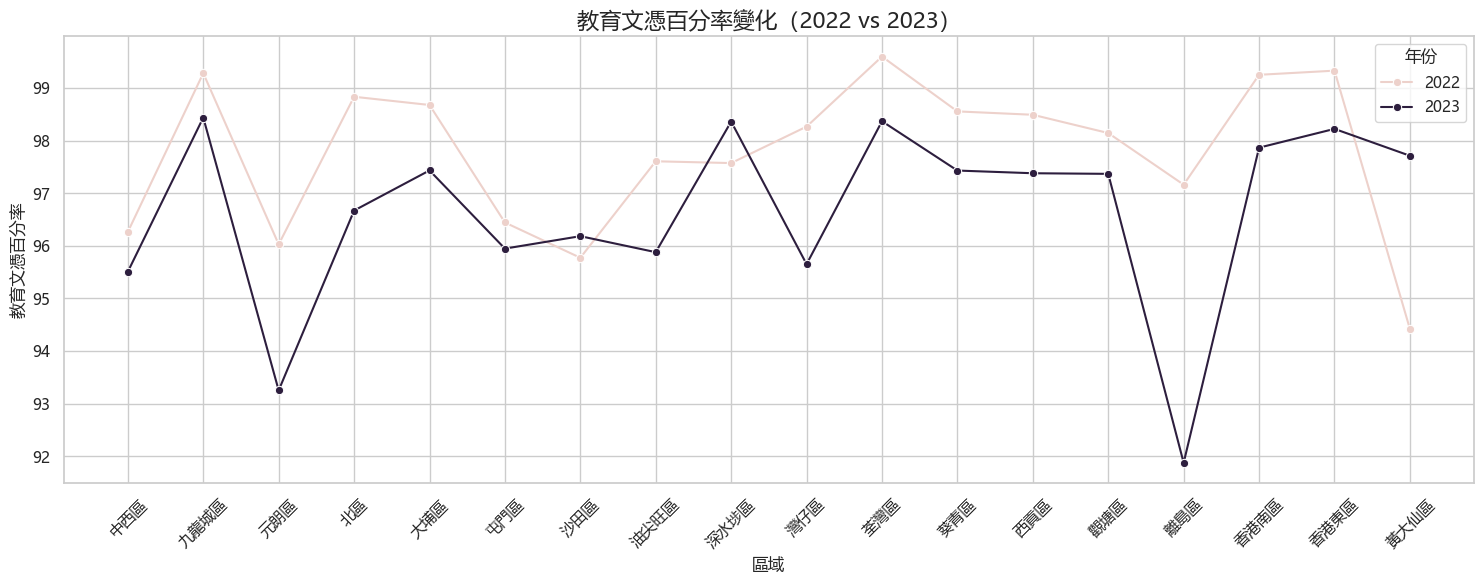

C:\Users\chris\AppData\Local\Temp\ipykernel_31444\1100216392.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='年份')


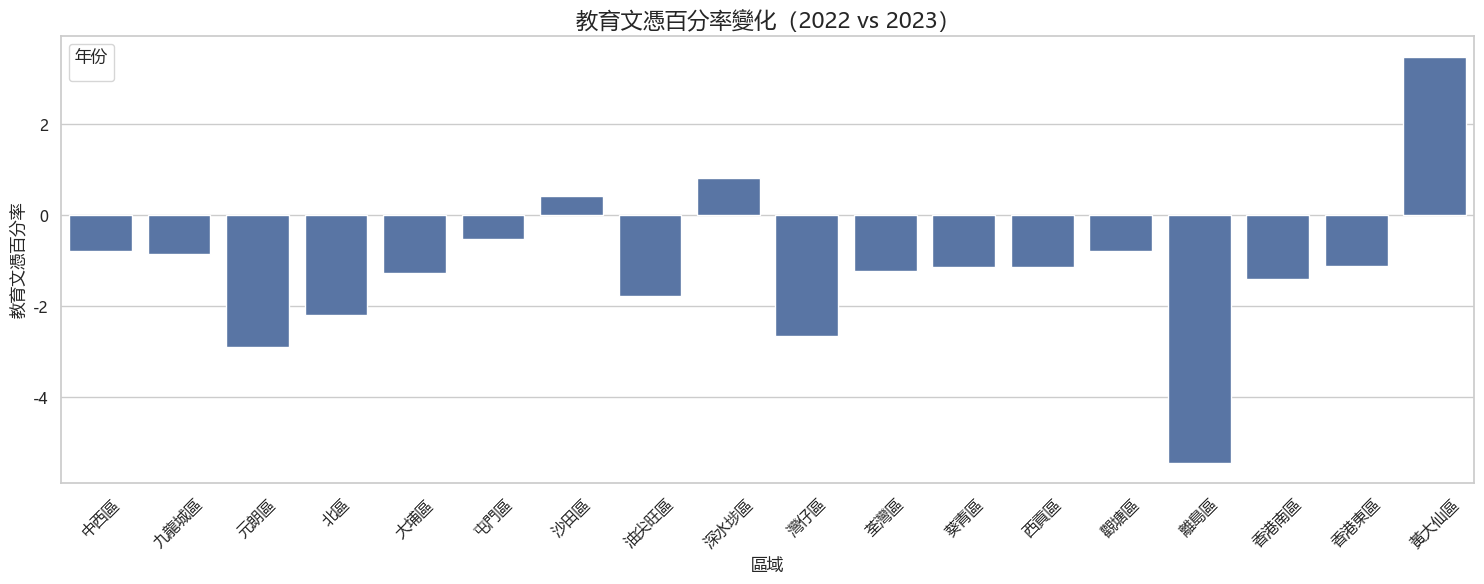

In [53]:
plot_education_diploma_rate(region_teacher, '區域', '教育文憑百分率', '教育文憑百分率變化（2022 vs 2023）', '區域', '教育文憑百分率')
plot_education_diploma_rate_change(region_teacher, '區域', '教育文憑百分率', '教育文憑百分率變化（2022 vs 2023）', '區域', '教育文憑百分率')

- Drop in ED percentage in most districts, with the largest percentage drop in the Islands District

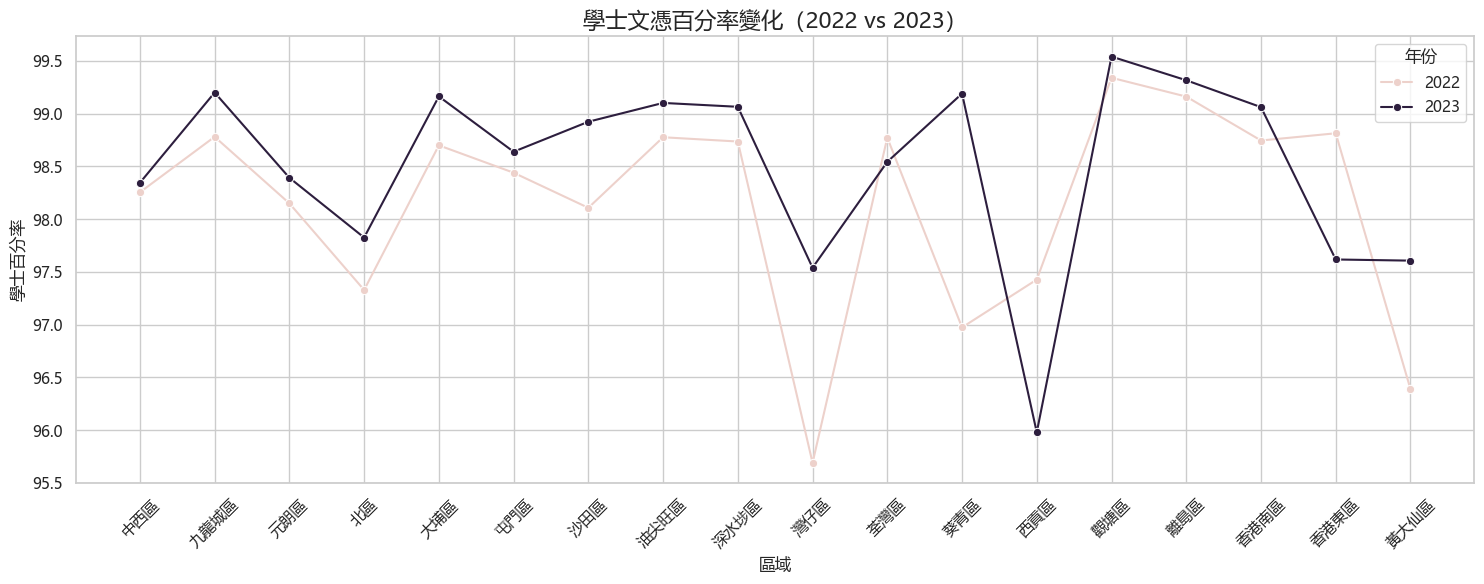

C:\Users\chris\AppData\Local\Temp\ipykernel_31444\1100216392.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='年份')


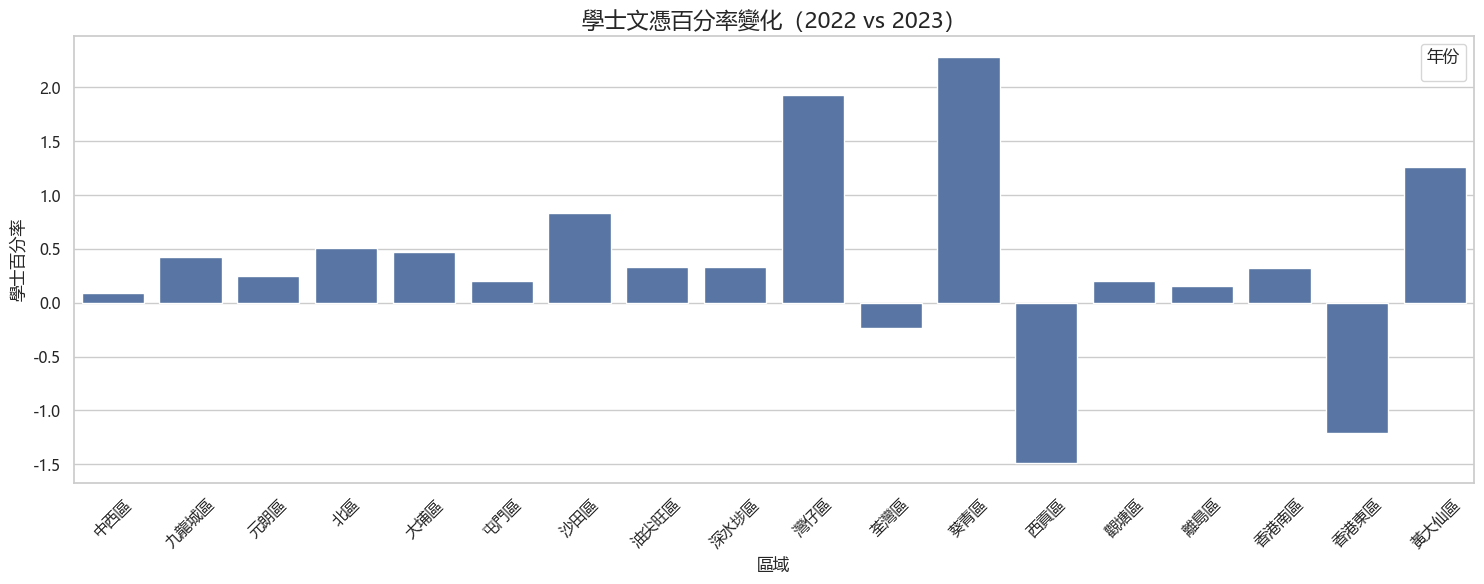

In [54]:
plot_education_diploma_rate(region_teacher, '區域', '學士百分率', '學士文憑百分率變化（2022 vs 2023）', '區域', '學士百分率')
plot_education_diploma_rate_change(region_teacher, '區域', '學士百分率', '學士文憑百分率變化（2022 vs 2023）', '區域', '學士百分率')

- The percentage of teachers with a bachelor's degree stayed the same or went up in most districts. In Kowloon City, for example, it went from 98.78% to 99.20%. This shows that the district still values teachers with a bachelor's degree.

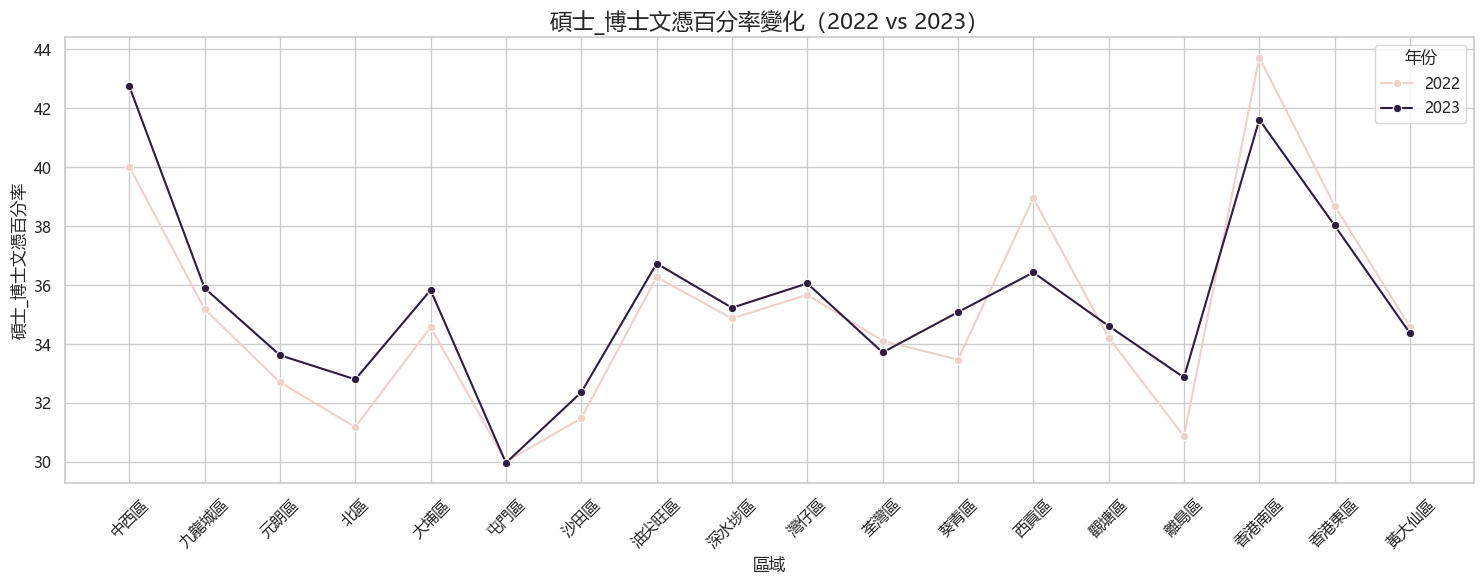

C:\Users\chris\AppData\Local\Temp\ipykernel_31444\1100216392.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='年份')


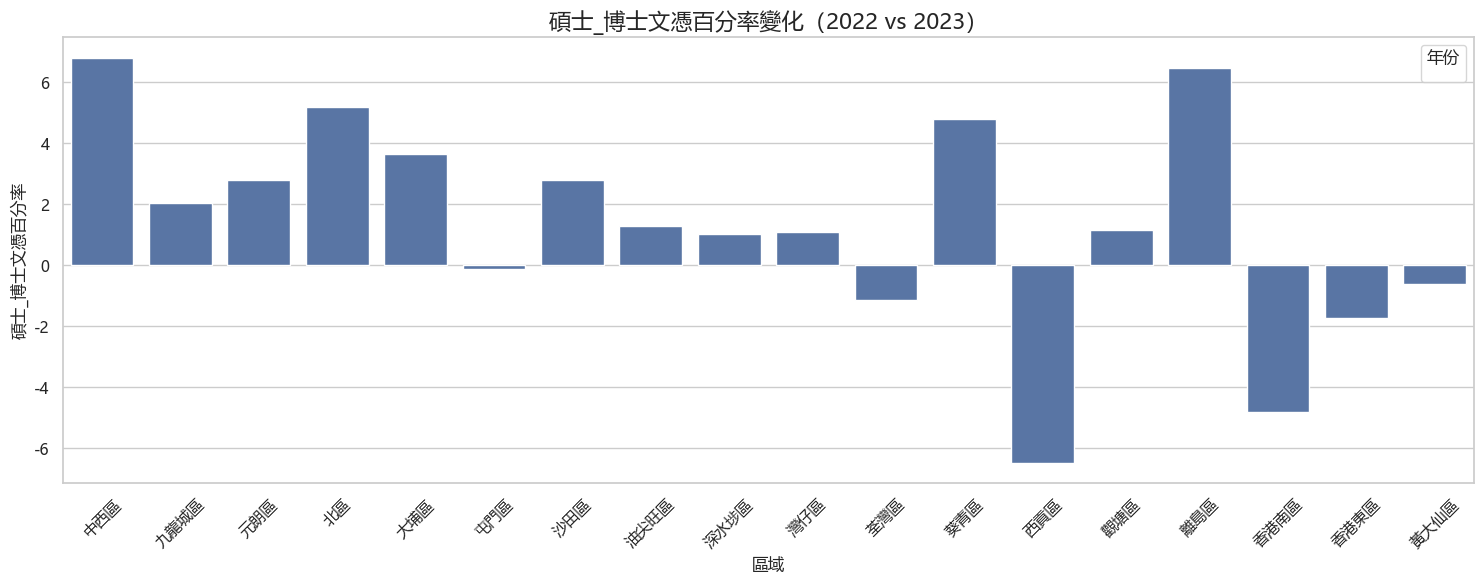

In [55]:
plot_education_diploma_rate(region_teacher, '區域', '碩士_博士百分率', '碩士_博士文憑百分率變化（2022 vs 2023）', '區域', '碩士_博士文憑百分率')
plot_education_diploma_rate_change(region_teacher, '區域', '碩士_博士百分率', '碩士_博士文憑百分率變化（2022 vs 2023）', '區域', '碩士_博士文憑百分率')

- The percentage of teachers with master's and doctoral degrees has increased in most districts, indicating growth in highly credentialed teachers.

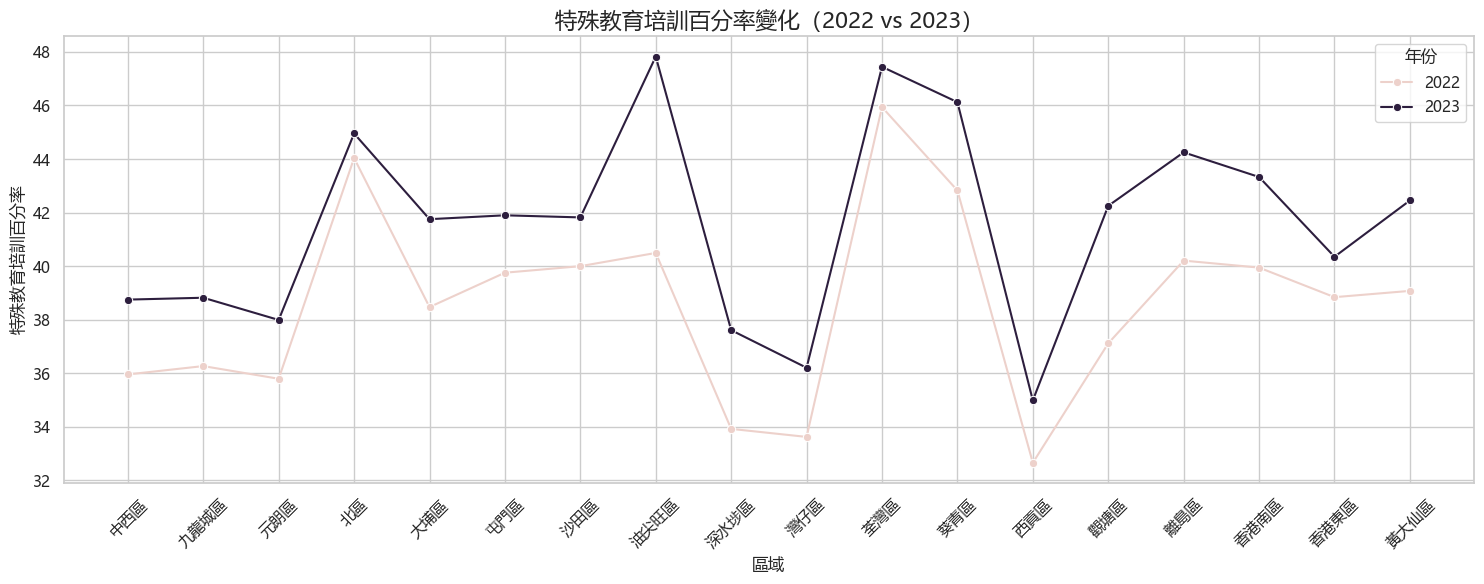

C:\Users\chris\AppData\Local\Temp\ipykernel_31444\1100216392.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='年份')


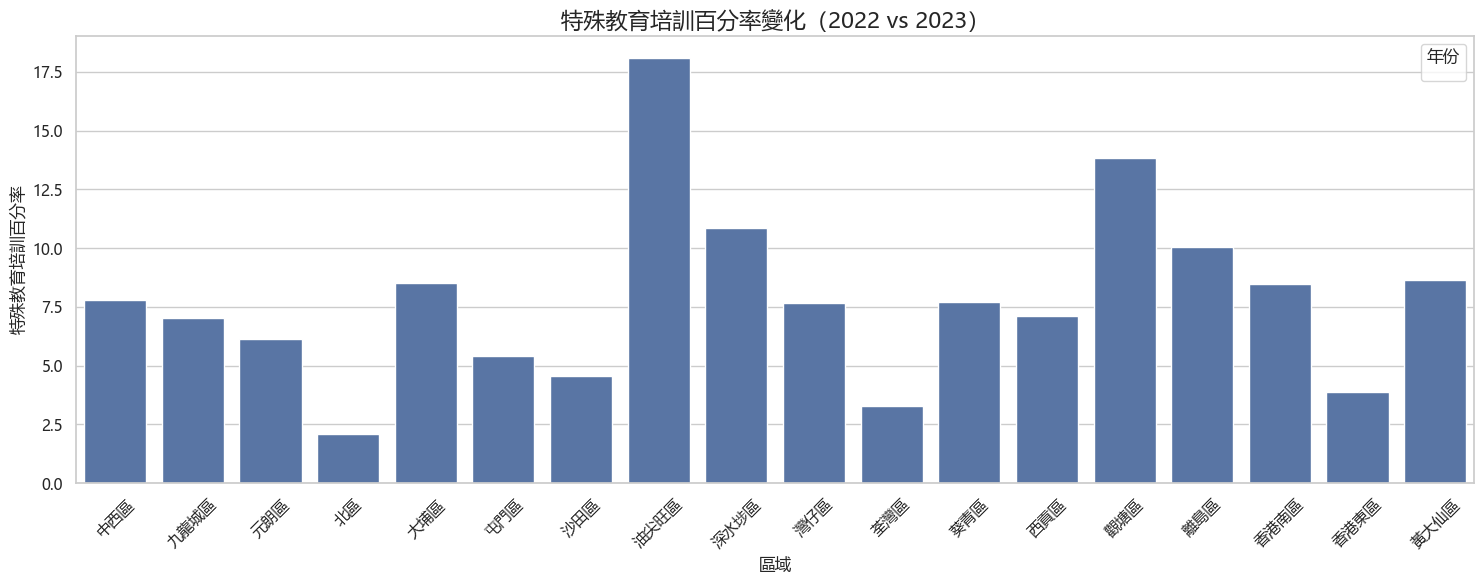

In [56]:
plot_education_diploma_rate(region_teacher, '區域', '特殊教育培訓百分率', '特殊教育培訓百分率變化（2022 vs 2023）', '區域', '特殊教育培訓百分率')
plot_education_diploma_rate_change(region_teacher, '區域', '特殊教育培訓百分率', '特殊教育培訓百分率變化（2022 vs 2023）', '區域', '特殊教育培訓百分率')

- The percentage of special education training increased across all districts, indicating that more teachers received specialized training to better respond to special education needs

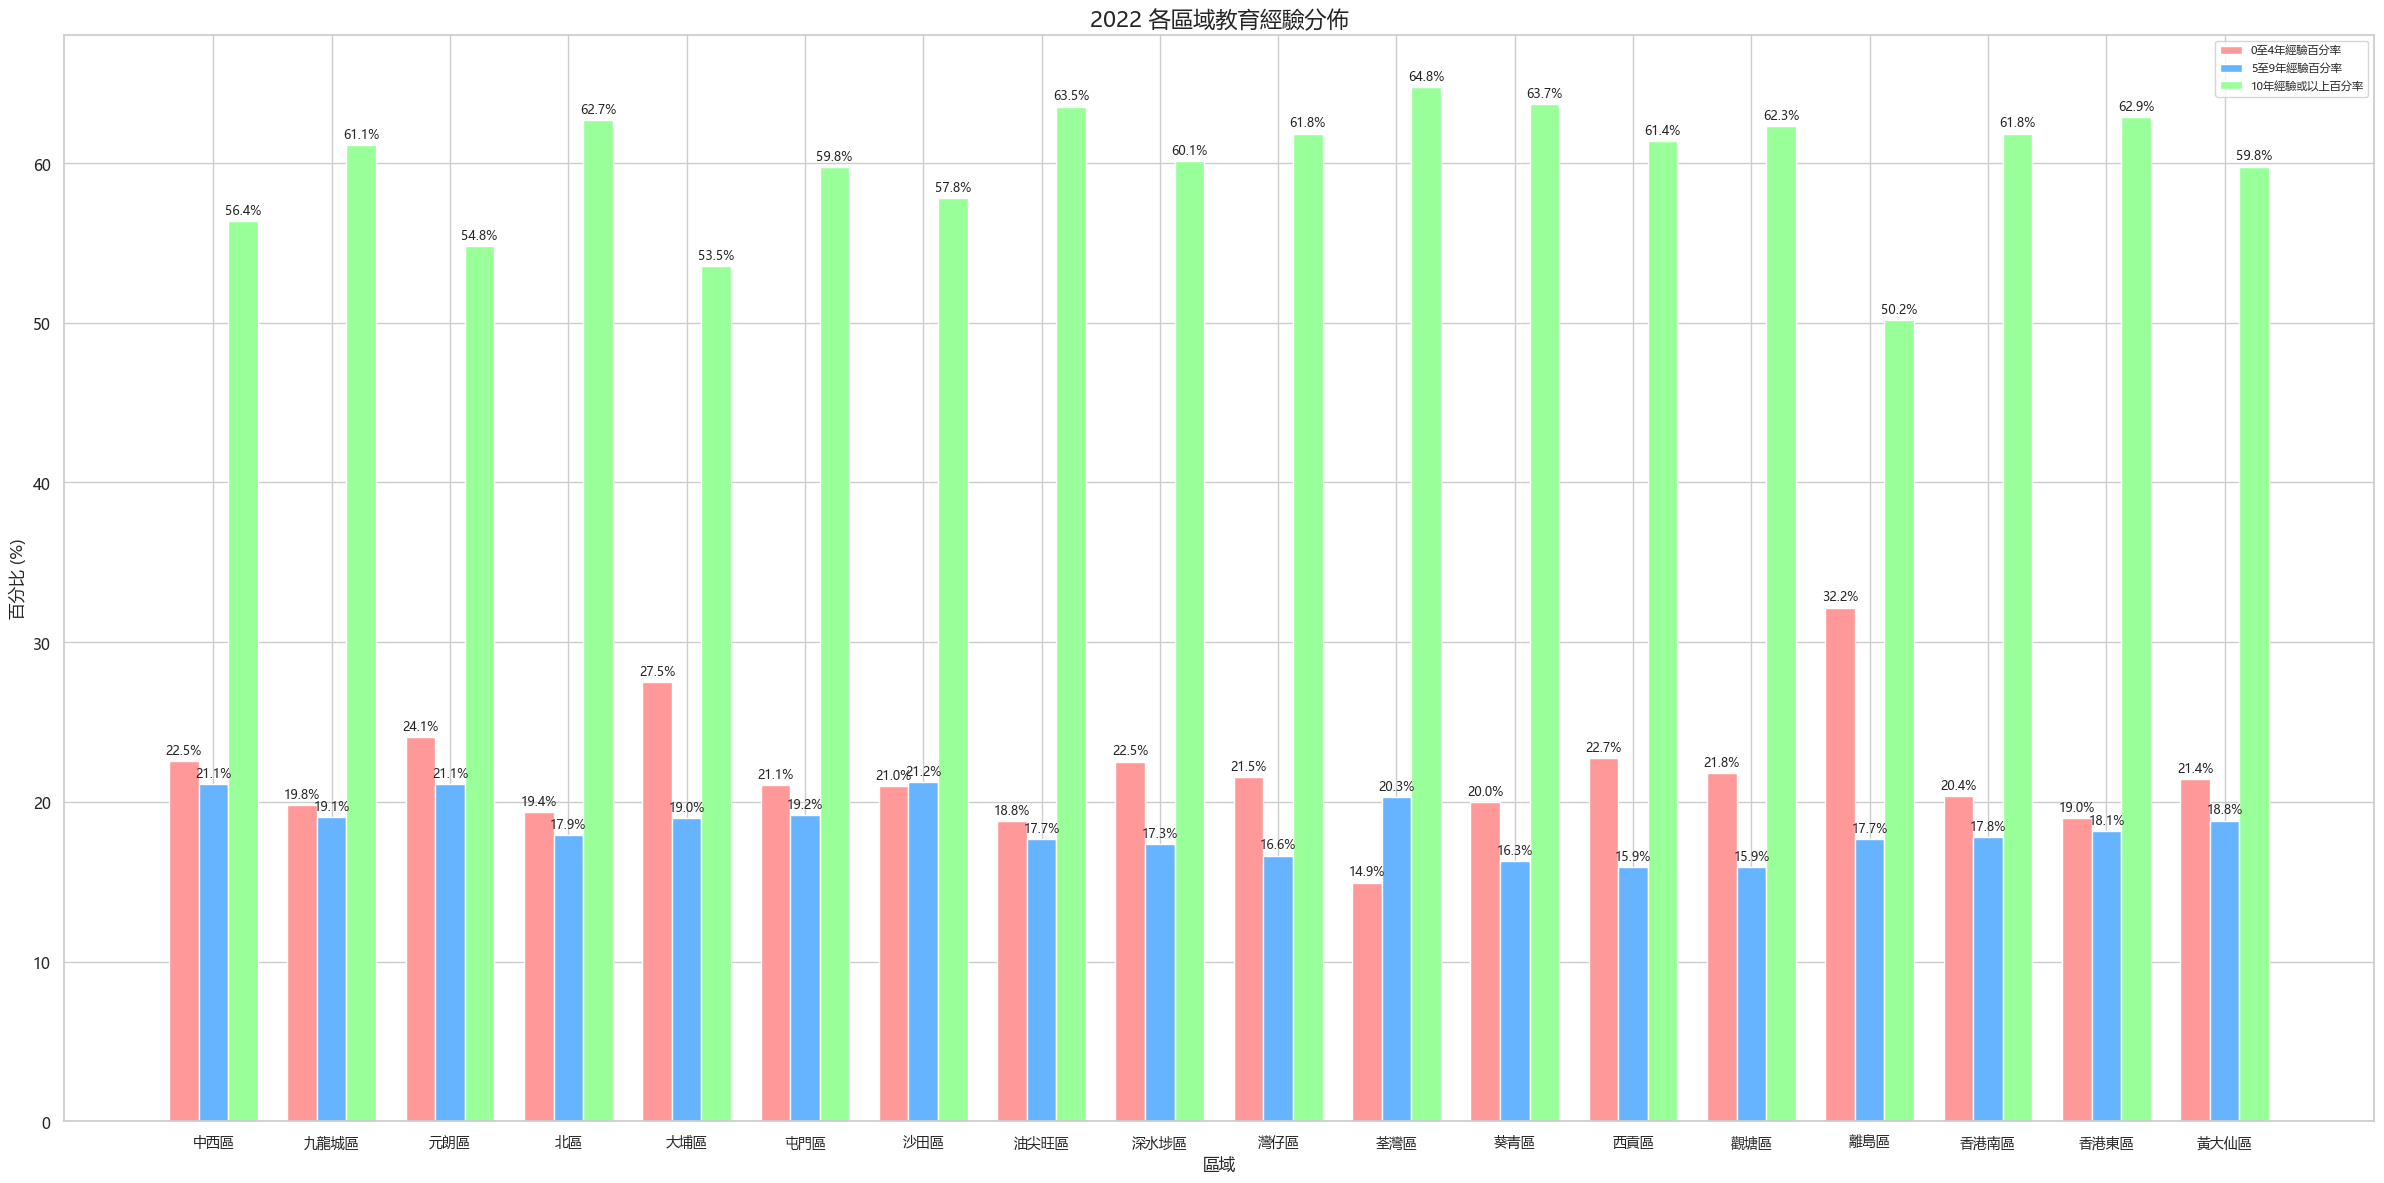

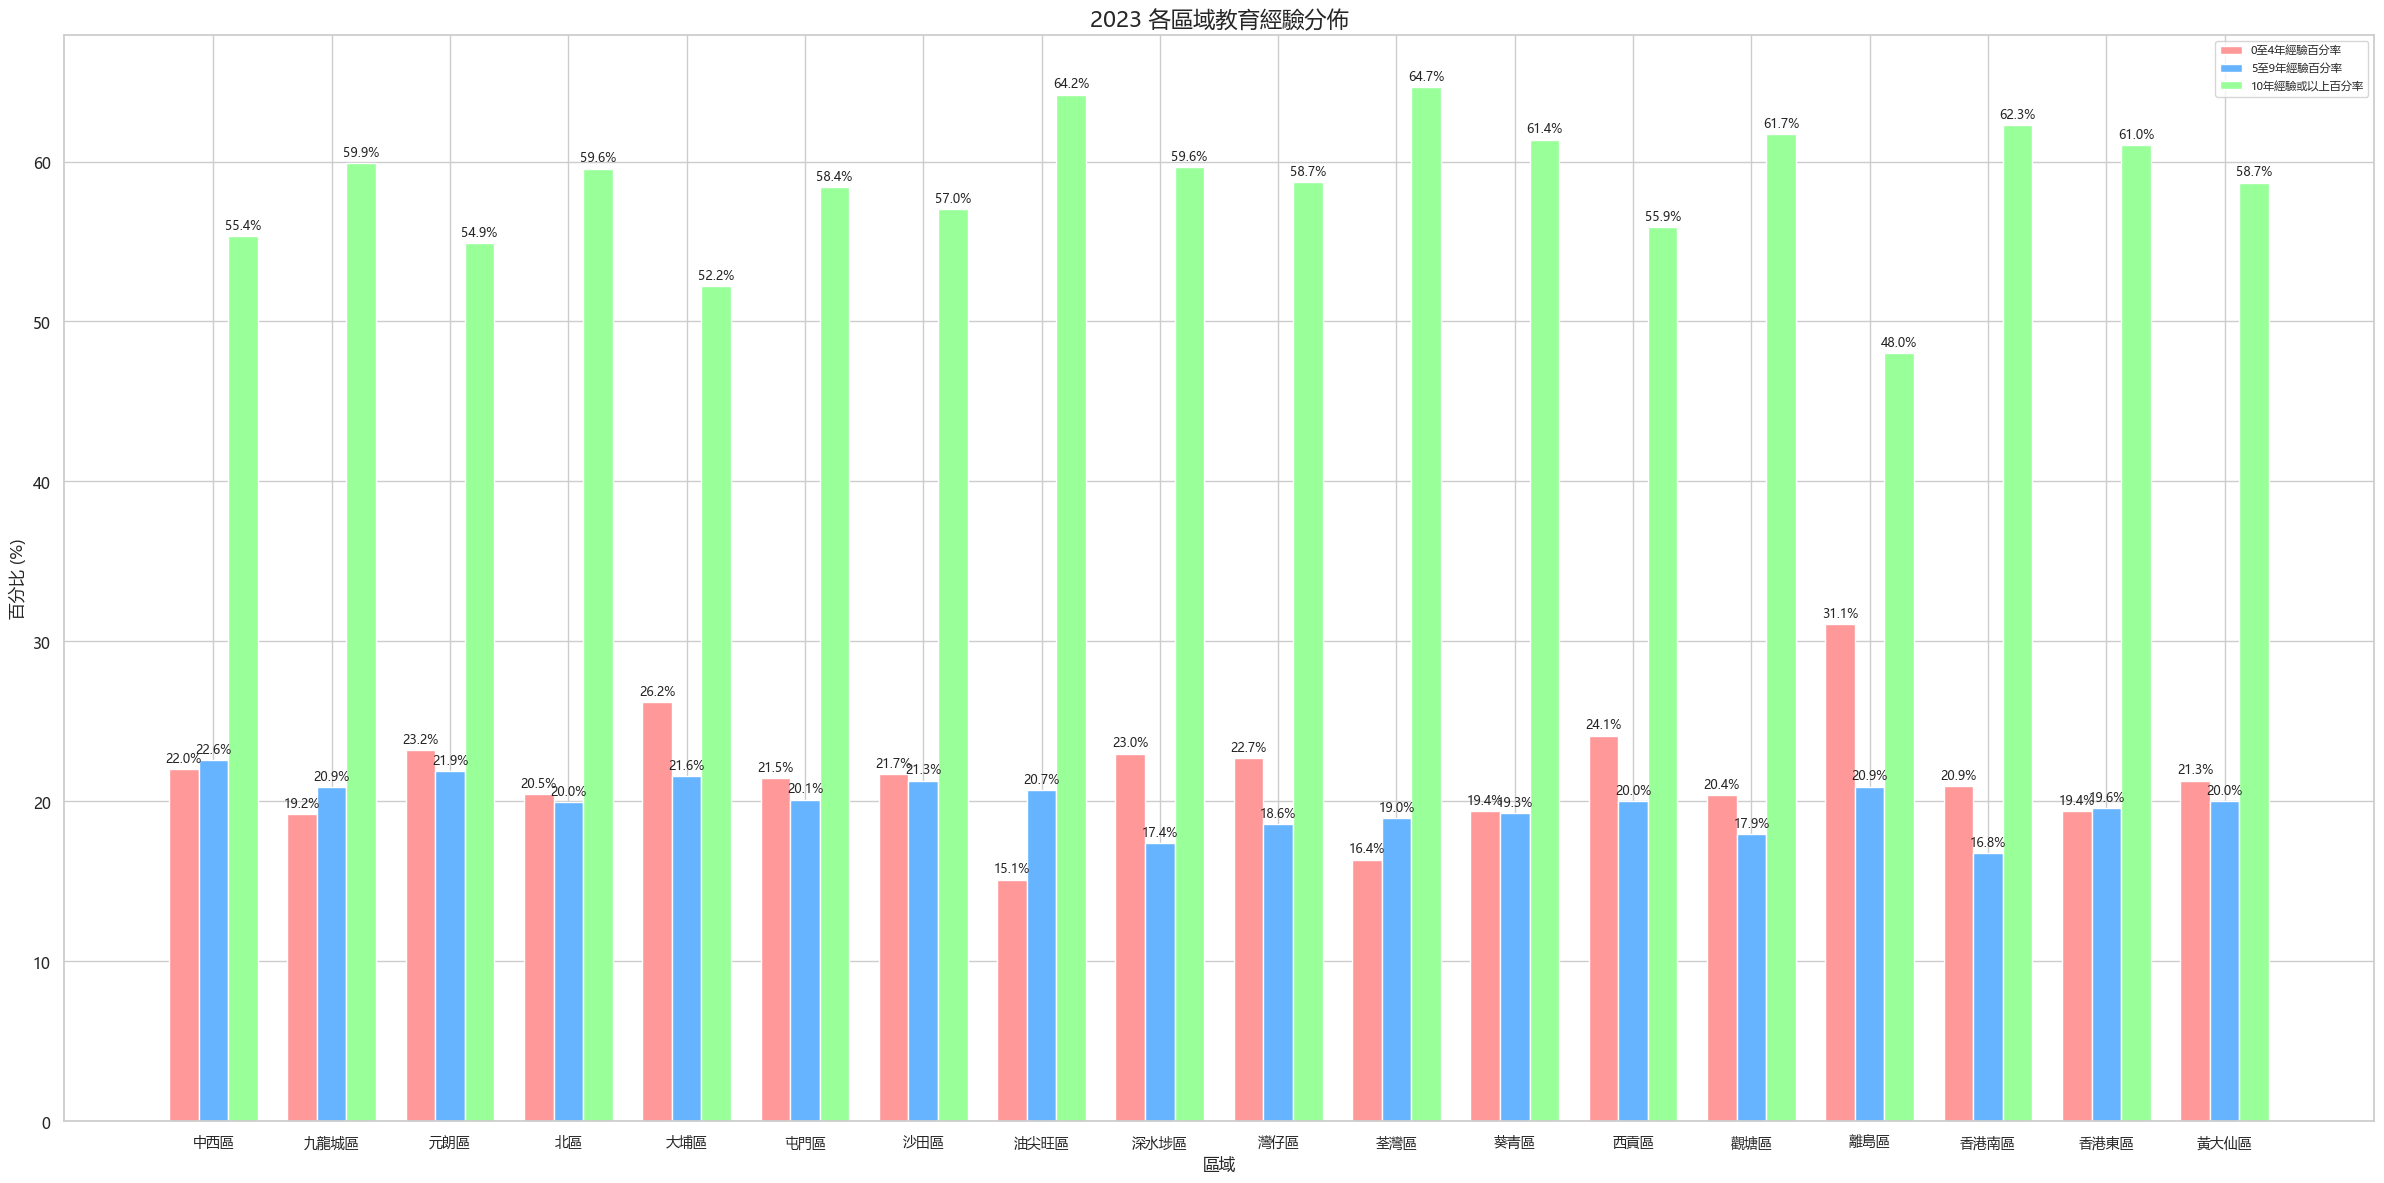

In [19]:
def plot_experience_distribution(result, categories, year):
    regions = result['區域'] 
    values = result[categories]  

    x = np.arange(len(regions)) 
    width = 0.25  


    fig, ax = plt.subplots(figsize=(24, 12))


    rects1 = ax.bar(x - width, values[categories[0]], width, label=categories[0], color='#ff9999')
    rects2 = ax.bar(x, values[categories[1]], width, label=categories[1], color='#66b3ff')
    rects3 = ax.bar(x + width, values[categories[2]], width, label=categories[2], color='#99ff99')


    ax.set_xlabel('區域', fontsize=12)
    ax.set_ylabel('百分比 (%)', fontsize=12)
    ax.set_title(f'{year} 各區域教育經驗分佈', fontsize=16)
    ax.set_xticks(x)
    ax.set_xticklabels(regions, rotation=0, fontsize=10)
    ax.legend(fontsize=8)


    def add_labels(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f'{height:.1f}%',  
                        xy=(rect.get_x() + rect.get_width() / 2, height),  
                        xytext=(0, 3),  
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=9)

    add_labels(rects1)
    add_labels(rects2)
    add_labels(rects3)

    
    plt.tight_layout()
    plt.show()
    
categories = ['0至4年經驗百分率', '5至9年經驗百分率', '10年經驗或以上百分率']
plot_experience_distribution(result_2022, categories, 2022)
plot_experience_distribution(result_2023, categories, 2023)


- The number of new teachers with 0 to 4 years of experience increased or decreased in different districts. In Yau Tsim Mong District, the number of new teachers with less than five years of experience decreased. In Sai Kung, the number of new teachers increased.
- Some districts saw a slight change in the number of teachers with five to nine years of experience. In the Islands districts, for example, the percentage increased from 17.67% to 20.93%.
- Teachers with more than 10 years of experience: Most districts stayed the same, but some, like Yau Tsim Mong, saw more experienced teachers staying in the profession.

Conclusion：Teachers in Hong Kong are getting better qualifications and more experience. This shows that the education sector is working to improve teachers and education quality. These changes will help to improve primary education in Hong Kong.

### Allocation of Educational Resources: School Type Differences

- A new government elementary school in Hong Kong from 2022 to 2023.

In [35]:
type_counts_2022 = psp_2022['學校類別1'].value_counts()
type_counts_2023 = psp_2023['學校類別1'].value_counts()

In [36]:
print(type_counts_2022)

學校類別1
資助    422
官立     34
私立     34
直資     21
Name: count, dtype: int64


In [37]:
print(type_counts_2023)

學校類別1
資助    422
官立     34
私立     33
直資     21
Name: count, dtype: int64


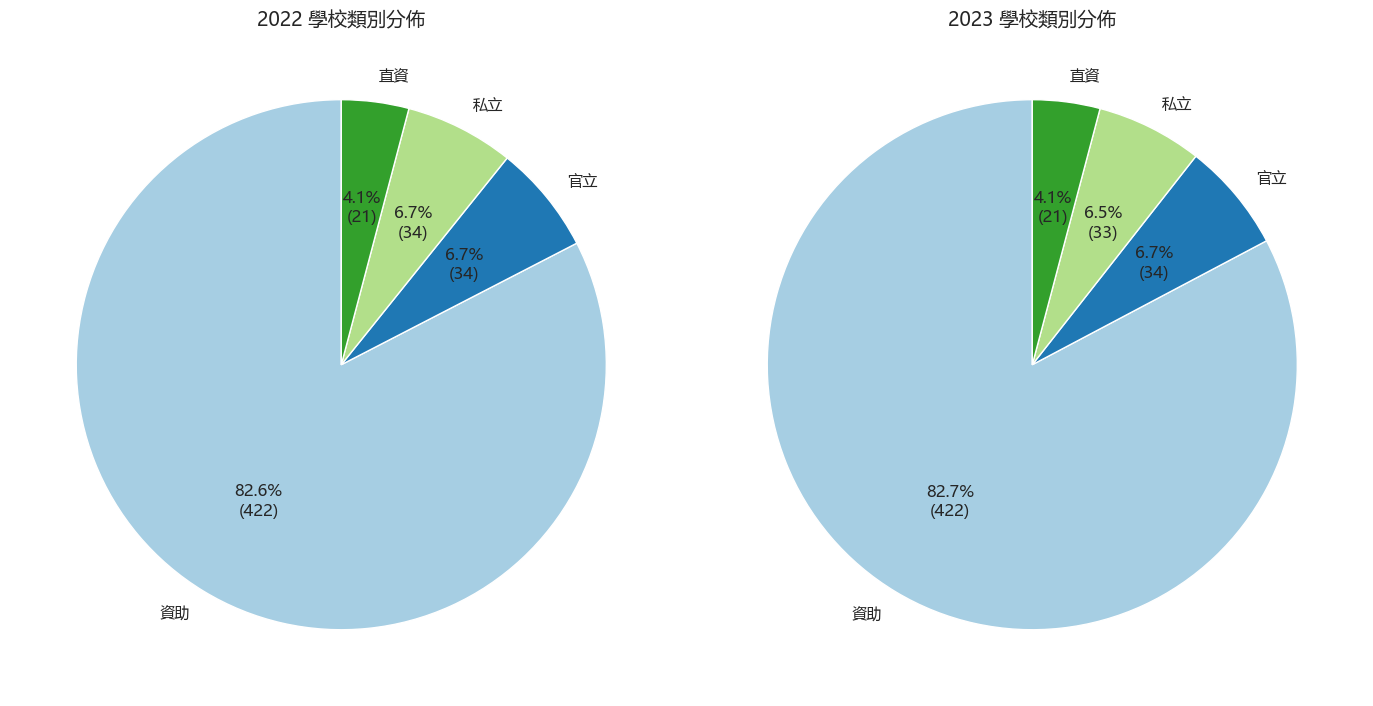

In [44]:
def visualize_pie_chart_with_values(type_counts_2022, type_counts_2023):
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 7))
    
    def make_autopct(values):
        def custom_autopct(pct):
            total = sum(values)
            count = int(round(pct * total / 100.0))
            return f"{pct:.1f}%\n({count})"
        return custom_autopct

    # 2022
    axes[0].pie(
        type_counts_2022, 
        labels=type_counts_2022.index, 
        autopct=make_autopct(type_counts_2022), 
        startangle=90, 
        colors=plt.cm.Paired.colors
    )
    axes[0].set_title("2022 學校類別分佈", fontsize=14)
    
    # 2023
    axes[1].pie(
        type_counts_2023, 
        labels=type_counts_2023.index, 
        autopct=make_autopct(type_counts_2023), 
        startangle=90, 
        colors=plt.cm.Paired.colors
    )
    axes[1].set_title("2023 學校類別分佈", fontsize=14)
    
    plt.tight_layout()
    plt.show()


visualize_pie_chart_with_values(type_counts_2022, type_counts_2023)


- 1 fewer private schools in 2023

In [23]:
type_teacher_2022 = psp_2022[['學校類別1','教師總人數','教育文憑人數百分率',
    '學士人數百分率','碩士_博士或以上人數百分率','特殊教育培訓人數百分率','0至4年經驗人數百分率',
    '5至9年經驗人數百分率','10年經驗或以上人數百分率']]

type_teacher_2023 = psp_2023[['學校類別1','教師總人數','教育文憑人數百分率',
    '學士人數百分率','碩士_博士或以上人數百分率','特殊教育培訓人數百分率','0至4年經驗人數百分率',
    '5至9年經驗人數百分率','10年經驗或以上人數百分率']]

In [24]:
print(type_teacher_2022)

    學校類別1  教師總人數  教育文憑人數百分率  學士人數百分率  碩士_博士或以上人數百分率  特殊教育培訓人數百分率  0至4年經驗人數百分率  \
0      資助     30        100       97             34           52           21   
1      直資     55        100      100             59           30           20   
2      資助     51        100      100             37           27           57   
3      資助     38        100      100             39           56           21   
4      資助     30        100      100             20           50           20   
..    ...    ...        ...      ...            ...          ...          ...   
506    私立      5         60       80             20            0           10   
507    私立     27         85      100             37           11           44   
508    資助     20        100      100             80           40           10   
509    資助     15         93      100             21           13           53   
510    私立     10         89      100             89            0            0   

     5至9年經驗人數百分率  10年經驗或以上人

In [25]:
def type_teacher(group):
    total = group['教師總人數'].sum()
    per_education = (group['教育文憑人數百分率'] * group['教師總人數']).sum() / total
    per_bachelor = (group['學士人數百分率'] * group['教師總人數']).sum() / total
    per_master_phd = (group['碩士_博士或以上人數百分率'] * group['教師總人數']).sum() / total
    per_special_edu = (group['特殊教育培訓人數百分率'] * group['教師總人數']).sum() / total
    exp_0to4 = (group['0至4年經驗人數百分率'] * group['教師總人數']).sum() / total
    exp_5to9 = (group['5至9年經驗人數百分率'] * group['教師總人數']).sum() / total
    exp_10plus = (group['10年經驗或以上人數百分率'] * group['教師總人數']).sum() / total
    return pd.Series({
        '教師總人數': total,
        '教育文憑百分率': per_education,
        '學士百分率': per_bachelor,
        '碩士_博士百分率': per_master_phd,
        '特殊教育培訓百分率': per_special_edu,
        '0至4年經驗百分率': exp_0to4,
        '5至9年經驗百分率': exp_5to9,
        '10年經驗或以上百分率': exp_10plus
    })

In [26]:
type_2022 = type_teacher_2022.groupby("學校類別1").apply(type_teacher).reset_index()
type_2023 = type_teacher_2023.groupby("學校類別1").apply(type_teacher).reset_index()

print(type_2022)
print(type_2023)

  學校類別1    教師總人數    教育文憑百分率      學士百分率   碩士_博士百分率  特殊教育培訓百分率  0至4年經驗百分率  \
0    官立   1666.0  99.162665  97.504202  32.698679  44.679472   9.187875   
1    直資   1512.0  91.533730  97.812169  48.943122  21.572090  26.885582   
2    私立   1497.0  95.520374  96.871743  35.028056   9.279893  30.903808   
3    資助  21092.0  98.062630  98.333017  33.506448  41.138441  21.415323   

   5至9年經驗百分率  10年經驗或以上百分率  
0  15.633854    75.178271  
1  20.716931    52.397487  
2  21.298597    47.797595  
3  18.447231    60.137445  
  學校類別1    教師總人數    教育文憑百分率      學士百分率   碩士_博士百分率  特殊教育培訓百分率  0至4年經驗百分率  \
0    官立   1604.0  99.740648  98.000000  32.608479  52.003117   6.645885   
1    直資   1511.0  88.068167  97.852416  47.301787  22.420251  29.195235   
2    私立   1457.0  93.730954  97.133150  34.109128  10.300618  33.246397   
3    資助  20938.0  97.237750  98.703553  34.191757  43.936718  21.069348   

   5至9年經驗百分率  10年經驗或以上百分率  
0  16.012469    77.341646  
1  20.266049    50.538716  
2  21.157172    45.59643

C:\Users\chris\AppData\Local\Temp\ipykernel_31444\416600690.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  type_2022 = type_teacher_2022.groupby("學校類別1").apply(type_teacher).reset_index()
C:\Users\chris\AppData\Local\Temp\ipykernel_31444\416600690.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  type_2023 = type_teacher_2023.groupby("學校類別1").apply(type_teacher).reset_index()


- Higher number of DSS-type schools and therefore a larger proportion of teachers
- DSS-type schools have more educated teachers
- Government schools provide more special education and have more teachers with more years of teaching experience

In [27]:
type_2022['年份'] = 2022
type_2023['年份'] = 2023

In [28]:
type_teacher = pd.concat([type_2022, type_2023])

In [29]:
def plot_schooltype_teacher_education(type_2022,x_col, y_col, title, xlabel, ylabel):
    plt.figure(figsize=(15, 6))
    sns.lineplot(data=type_teacher, x=x_col, y=y_col, hue='年份', marker='o')
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.legend(title='年份')
    plt.tight_layout()
    plt.show()


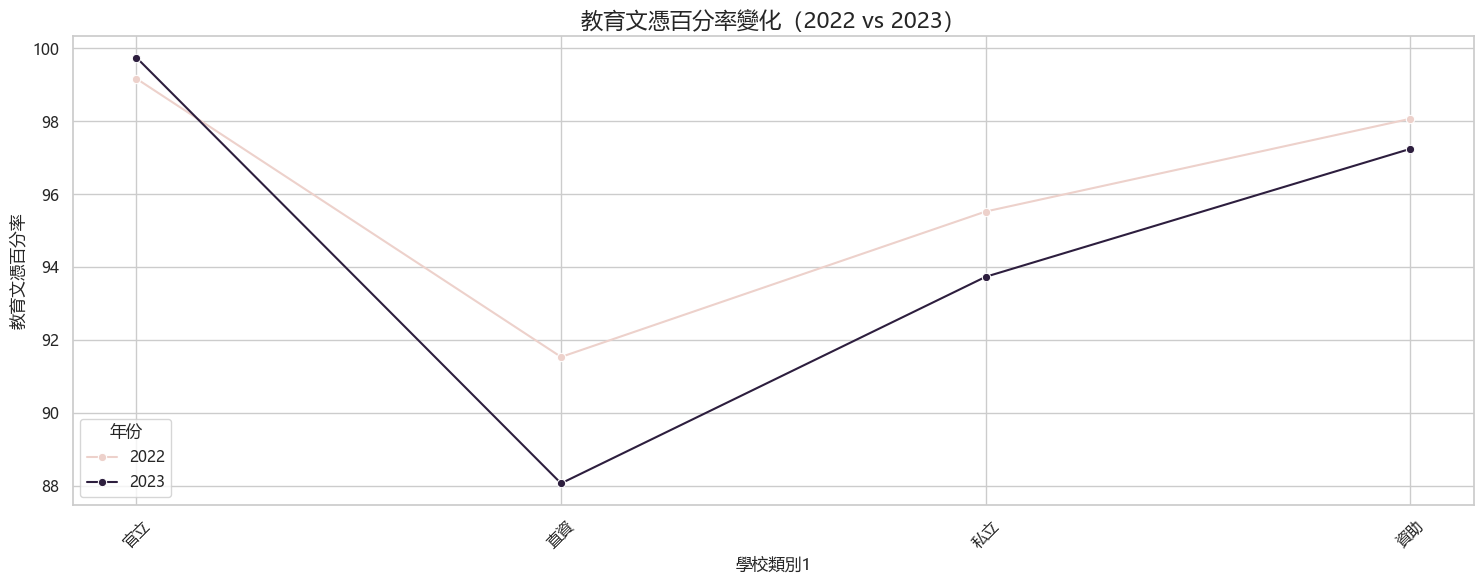

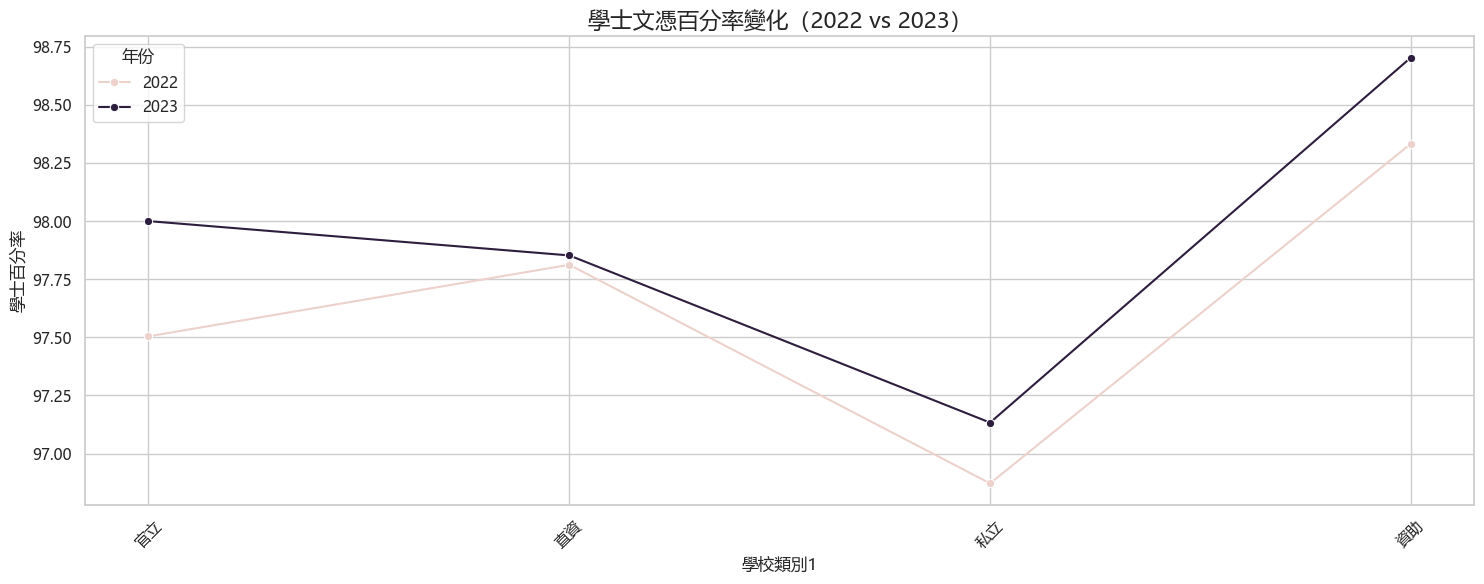

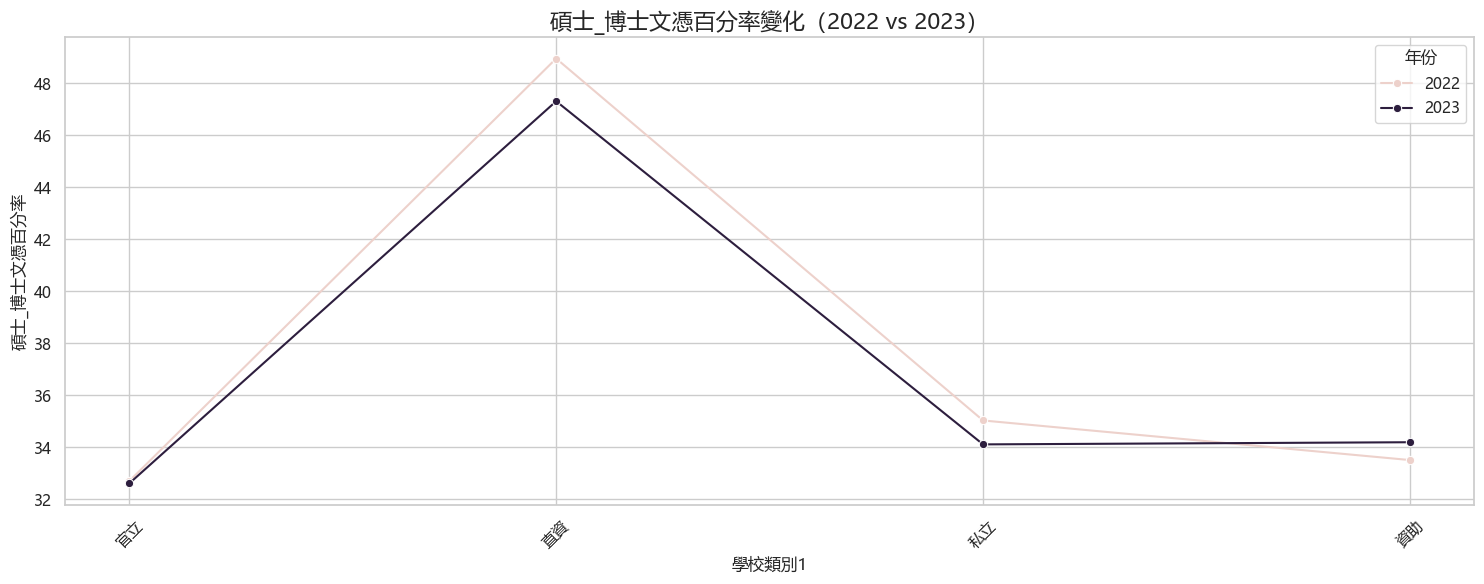

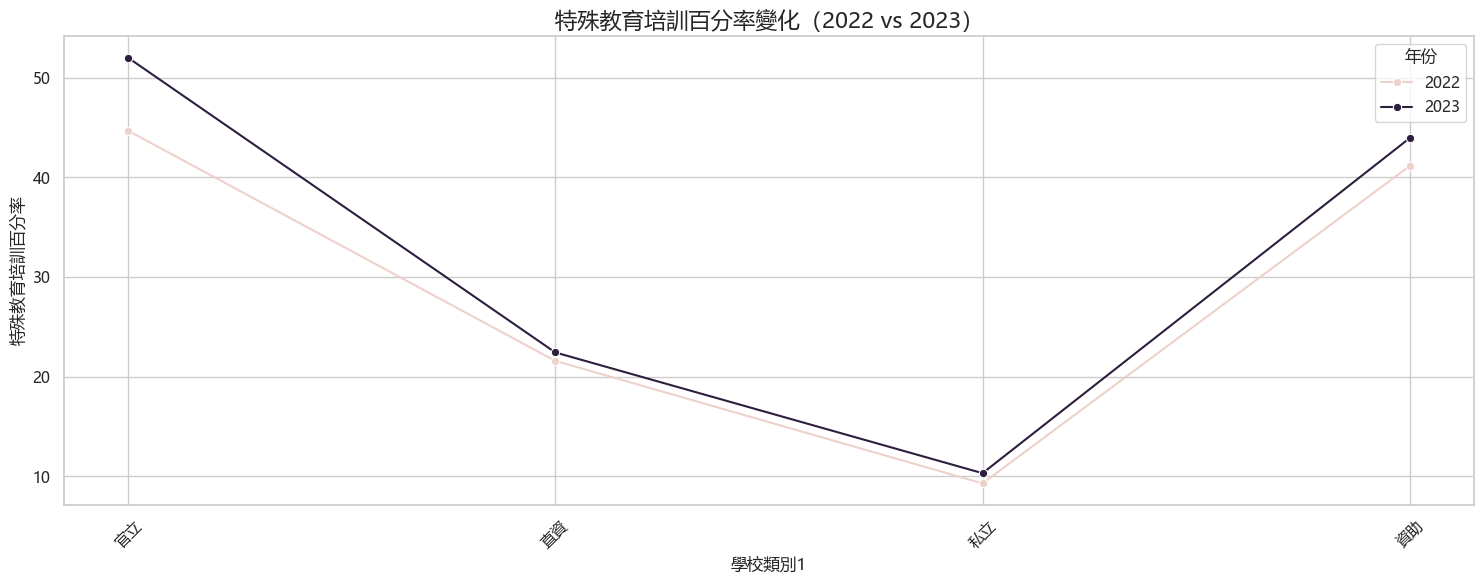

In [30]:
plot_schooltype_teacher_education(type_teacher, '學校類別1', '教育文憑百分率', '教育文憑百分率變化（2022 vs 2023）', '學校類別1', '教育文憑百分率')
plot_schooltype_teacher_education(type_teacher, '學校類別1', '學士百分率', '學士文憑百分率變化（2022 vs 2023）', '學校類別1', '學士百分率')
plot_schooltype_teacher_education(type_teacher, '學校類別1', '碩士_博士百分率', '碩士_博士文憑百分率變化（2022 vs 2023）', '學校類別1', '碩士_博士文憑百分率')
plot_schooltype_teacher_education(type_teacher, '學校類別1', '特殊教育培訓百分率', '特殊教育培訓百分率變化（2022 vs 2023）', '學校類別1', '特殊教育培訓百分率')

- Diploma in school education declined in all types of schools except government schools
- The percentage of teachers with Bachelor's Degree (BDS) and Special Education Training (SET) increased in all types of schools compared to previous years
- Little change in government schools for Master's Degree teachers, decline in DSS and private schools, and increase in aided types of schools

### School Type Map

In [13]:
import folium
import geopandas as gpd

In [20]:
position = pd.read_csv('primary_schools_position.csv')
position.drop(['SCHOOL NO.','就讀學生性別'], axis=1, inplace=True)

In [29]:
m = folium.Map(location=[position['LATITUDE'].mean(), position['LONGITUDE'].mean()], zoom_start=10)

category_colors = {
    '資助小學': '#FF0000',          
    '直接資助計劃小學': '#8B008B',  
    '官立小學': '#006400',          
    '私立小學': '#0000FF',          
}

for _, row in position.iterrows():
    school_type = row['中文類別']
    location = [row['LATITUDE'], row['LONGITUDE']]
    color = category_colors.get(school_type, 'gray')  
    popup_text = (
        f"|| 學校: {row['中文名稱']}  "
        f"|| 類別: {school_type}"
    )
    
    folium.CircleMarker(
        location,
        radius=3, 
        fill=True,
        color=color,
        fill_color=color,
        fill_opacity=0.7, 
        stroke=False,
        popup=popup_text  
    ).add_to(m)

In [30]:
m

## 4. Data Analytics Summaries and Challenges

### 4.1 Summaries

We analyzed how education resources are distributed and the profile of teachers in different districts and types of schools in Hong Kong. Here are our key findings.

Finding1:
- While most districts saw fewer students and teachers, some districts had more teachers. This shows that some districts are using their education resources better. Student-teacher ratios are stable, showing that education resources are being fairly allocated in Hong Kong. However, districts with fewer students may face school closures or unequal resource distribution. Districts with more teachers may also struggle to meet student demand.

Finding2:
- The proportion of teachers with at least a bachelor’s degree has remained stable or slightly increased, ensuring a solid foundation for teaching quality.
- An increase in the number of teachers with master’s and doctoral degrees highlights a growing professionalization of the teaching workforce.
- The significant rise in teachers trained for special education reflects heightened attention to addressing the diverse needs of students.

Finding3:
- Aided schools focus on hiring more teachers and raising their qualifications.
- DSS schools have fewer teachers with high academic qualifications, but more qualifications overall.
- The government is focusing more on the quality of special education and long-term services. These schools are important for the education system.

### 4.2 Challenges

- Challenges: The allocation of educational resources involves multiple dimensions (region, school type, teacher qualifications, etc.), with a huge amount of data and complex cross-influences, making it difficult to extract clear conclusions.

- Methodology: Step-by-step analysis by dimension (e.g., district followed by school type), with step-by-step generalization of major trends.